# Examples for packages/statistics/index.md

(plotting-simple-quantities-of-a-pandas-dataframe)=

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For loading data as data frames.
import pandas as pd

## Plotting simple quantities of a pandas dataframe

<!--- plot_pandas -->

This example loads from a CSV file data with mixed numerical and
categorical entries, and plots a few quantities, separately for females
and males, thanks to the pandas integrated plotting tool (that uses
matplotlib behind the scene).

See http://pandas.pydata.org/pandas-docs/stable/visualization.html

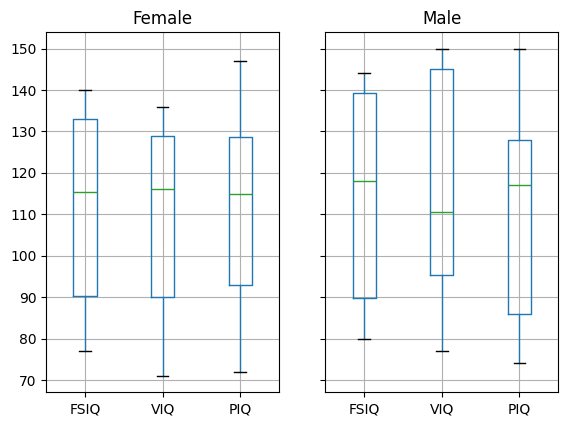

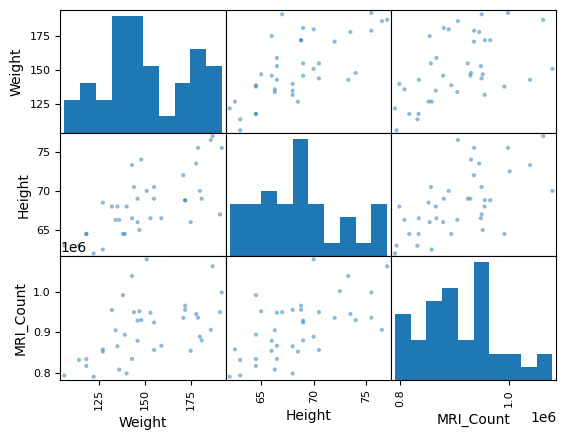

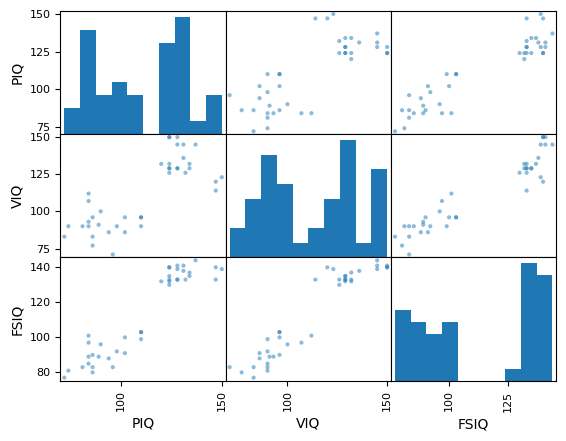

In [2]:
data = pd.read_csv("examples/brain_size.csv", sep=";", na_values=".")

# Box plots of different columns for each sex
groupby_sex = data.groupby("Gender")
groupby_sex.boxplot(column=["FSIQ", "VIQ", "PIQ"])

# Scatter matrices for different columns
pd.plotting.scatter_matrix(data[["Weight", "Height", "MRI_Count"]])
pd.plotting.scatter_matrix(data[["PIQ", "VIQ", "FSIQ"]]);

(boxplots-and-paired-differences)=

## Boxplots and paired differences

<!--- plot_paired_boxplots -->

Plot boxplots for FSIQ, PIQ, and the paired difference between the two:
while the spread (error bars) for FSIQ and PIQ are very large, there is a
systematic (common) effect due to the subjects. This effect is cancelled
out in the difference and the spread of the difference ("paired" by
subject) is much smaller than the spread of the individual measures.

([<matplotlib.axis.XTick at 0x10fc140b0>], [Text(1, 0, 'FSIQ - PIQ')])

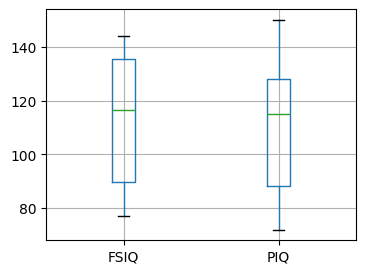

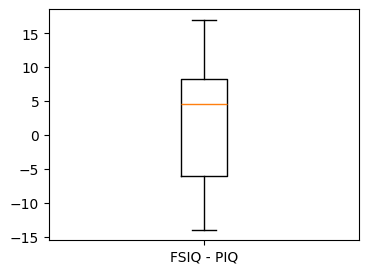

In [3]:
data = pd.read_csv("examples/brain_size.csv", sep=";", na_values=".")
# Box plot of FSIQ and PIQ (different measures od IQ)
plt.figure(figsize=(4, 3))
data.boxplot(column=["FSIQ", "PIQ"])
# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(data["FSIQ"] - data["PIQ"])
plt.xticks((1,), ("FSIQ - PIQ",))

(simple-regression)=

## Simple Regression

<!--- plot_regression -->

Fit a simple linear regression using 'statsmodels', compute corresponding
p-values.

**Original author: Thomas Haslwanter**

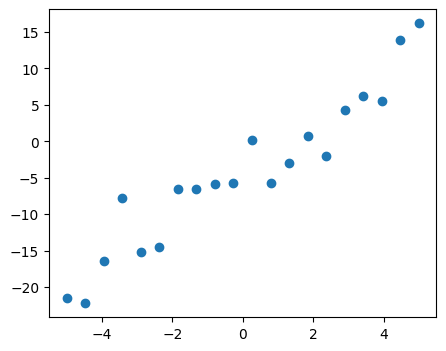

In [4]:
# For statistics.
# Import the formula interface to Statsmodels.
import statsmodels.formula.api as smf

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

# Generate and show the data
x = np.linspace(-5, 5, 20)

# To get reproducible values, provide a seed value
rng = np.random.default_rng(27446968)

y = -5 + 3 * x + 4 * rng.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, "o");

Multilinear regression model, calculating fit, P-values, confidence
intervals etc.

In [5]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels
data = pd.DataFrame({"x": x, "y": y})

In [6]:
# Fit the model
model = smf.ols("y ~ x", data).fit()

In [7]:
# Show the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.72e-10
Time:                        11:36:53   Log-Likelihood:                -51.758
No. Observations:                  20   AIC:                             107.5
Df Residuals:                      18   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2948      0.759     -5.661      0.000      -5.889      -2.701
x              3.2060      0.250     12.825      0.000       2.681       3.731
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.999
Skew:                           0.503   Prob(JB):                        0.607
Kurtosis:                       2.568   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Perform analysis of variance on fitted linear model
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,1893.370786,1893.370786,164.484593,1.717490e-10
Residual,18.0,207.196756,11.510931,NaN,NaN


Plot the fitted model

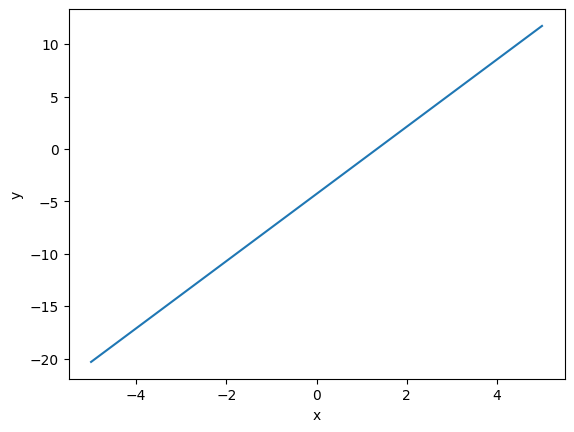

In [9]:
# Retrieve the parameter estimates
offset, coef = model._results.params
plt.plot(x, x * coef + offset)
plt.xlabel("x")
plt.ylabel("y");

(multiple-regression)=

## Multiple Regression

<!--- plot_regression_3d -->

Calculate using 'statsmodels' just the best fit, or all the corresponding
statistical parameters.

Also shows how to make 3d plots.

Original author: Thomas Haslwanter

In [10]:
# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

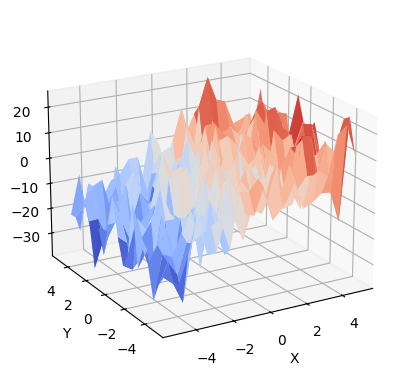

In [11]:
# Generate and show the data
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducible values, provide a seed value
rng = np.random.default_rng(27446968)

# Z is the elevation of this 2D grid
Z = -5 + 3 * X - 0.5 * Y + 8 * rng.normal(size=X.shape)

# Plot the data
ax: Axes3D = plt.figure().add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

Multilinear regression model, calculating fit, P-values, confidence
intervals etc.

Convert the data into a Pandas DataFrame to use the formulas framework
in statsmodels

In [12]:
# First we need to flatten the data: it's 2D layout is not relevant.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

In [13]:
data = pd.DataFrame({"x": X, "y": Y, "z": Z})

In [14]:
# Fit the model
model = smf.ols("z ~ x + y", data).fit()
# Show the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.35e-70
Time:                        11:36:53   Log-Likelihood:                -1553.9
No. Observations:                 441   AIC:                             3114.
Df Residuals:                     438   BIC:                             3126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0862      0.392    -12.975      0.000      -5.857      -4.316
x              2.8036      0.129     21.655      0.000       2.549       3.058
y             -0.3219      0.129     -2.486      0.013      -0.576      -0.067
==============================================================================
Omnibus:                        2.098   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.152
Skew:                          -0.137   Prob(JB):                        0.341
Kurtosis:                       2.796   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print("\nRetrieving the parameter estimates manually:")
print(model._results.params)


Retrieving the parameter estimates manually:
[-5.08619946  2.80358982 -0.32185766]


In [16]:
# Perform analysis of variance on fitted linear model
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,31774.518515,31774.518515,468.91858,3.152434e-71
y,1.0,418.772098,418.772098,6.18011,1.329127e-02
Residual,438.0,29679.436264,67.761270,NaN,NaN


(analysis-of-iris-petal-and-sepal-sizes)=

## Analysis of Iris petal and sepal sizes

<!--- plot_iris_analysis -->

Illustrate an analysis on a real dataset:

- Visualizing the data to formulate intuitions
- Fitting of a linear model
- Hypothesis test of the effect of a categorical variable in the presence
  of a continuous confound

In [17]:
# Load the data
data = pd.read_csv("examples/iris.csv")

Plot a scatter matrix

Text(0.5, 0.98, 'blue: setosa, green: versicolor, red: virginica')

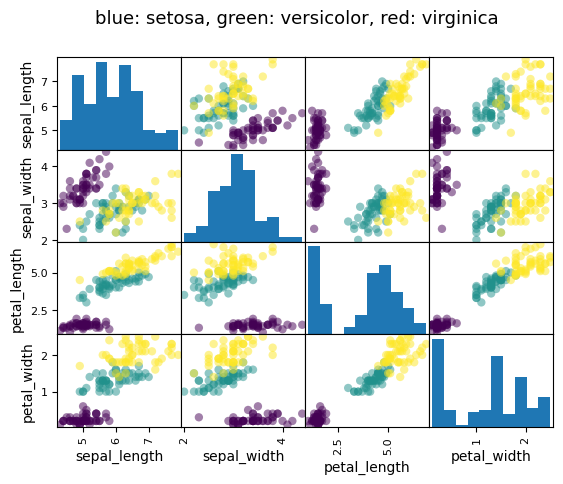

In [18]:
# Express the names as categories
categories = pd.Categorical(data["name"])

# The parameter 'c' is passed to plt.scatter and will control the color
pd.plotting.scatter_matrix(data, c=categories.codes, marker="o")

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

Statistical analysis

Let us try to explain the sepal length as a function of the petal
width and the category of iris

In [19]:
model = smf.ols("sepal_width ~ name + petal_length", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.58e-20
Time:                        11:36:54   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000       2.785       3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000      -1.840      -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000      -2.169      -1.158
petal_length           0.2983      0.061      4.920      0.000       0.178       0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now formulate a "contrast", to test if the offset for versicolor and
virginica are identical

In [20]:
print("Testing the difference between effect of versicolor and virginica")
print(model.f_test([0, 1, -1, 0]))

Testing the difference between effect of versicolor and virginica
<F test: F=3.2453353465741523, p=0.07369058781701222, df_denom=146, df_num=1>


(visualizing-factors-influencing-wages)=

## Visualizing factors influencing wages

<!--- plot_wage_data -->

This example uses Seaborn to quickly plot various factors relating wages,
experience, and education.

Seaborn (https://seaborn.pydata.org) is a library that combines
visualization and statistical fits to show trends in data.

Note that importing Seaborn changes the matplotlib style to have an
"excel-like" feeling. This changes affect other matplotlib figures. To
restore defaults once this example is run, we would need to call
`plt.rcdefaults()`.

In [21]:
data = pd.read_csv("examples/wages.txt",
    skiprows=27,
    skipfooter=6,
    sep=None,
    header=None,
    engine="python"  # To allow use of skipfooter.
)
# Give names to the columns
names = [
    "education: Number of years of education",
    "south: 1=person lives in South, 0=Person lives elsewhere",
    "sex: 1=female, 0=Male",
    "experience: Number of years of work experience",
    "union: 1=union member, 0=Not union member",
    "wage: wage (dollars per hour)",
    "age: years",
    "race: 1=other, 2=Hispanic, 3=White",
    "occupation: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other",
    "sector: 0=Other, 1=Manufacturing, 2=Construction",
    "marr: 0=unmarried,  1=Married",
]
short_names = [n.split(":")[0] for n in names]
data.columns = pd.Index(short_names)
# Log-transform the wages, because they typically are increased with
# multiplicative factors
data["wage"] = np.log10(data["wage"])
# Convert genders to strings (this is particularly useful so that the
# statsmodels formulas detects that `sex` is a categorical variable)
data["sex"] = np.choose(data['sex'], ["male", "female"])

Plot scatter matrices highlighting different aspects

In [22]:
import seaborn

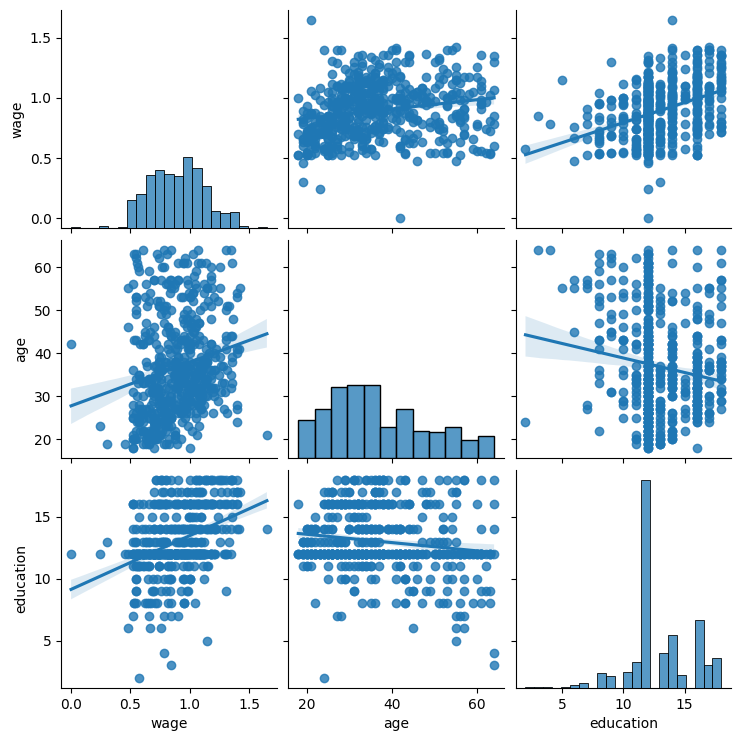

In [23]:
seaborn.pairplot(data, vars=["wage", "age", "education"], kind="reg")

Text(0.5, 0.98, 'Effect of sex: 1=Female, 0=Male')

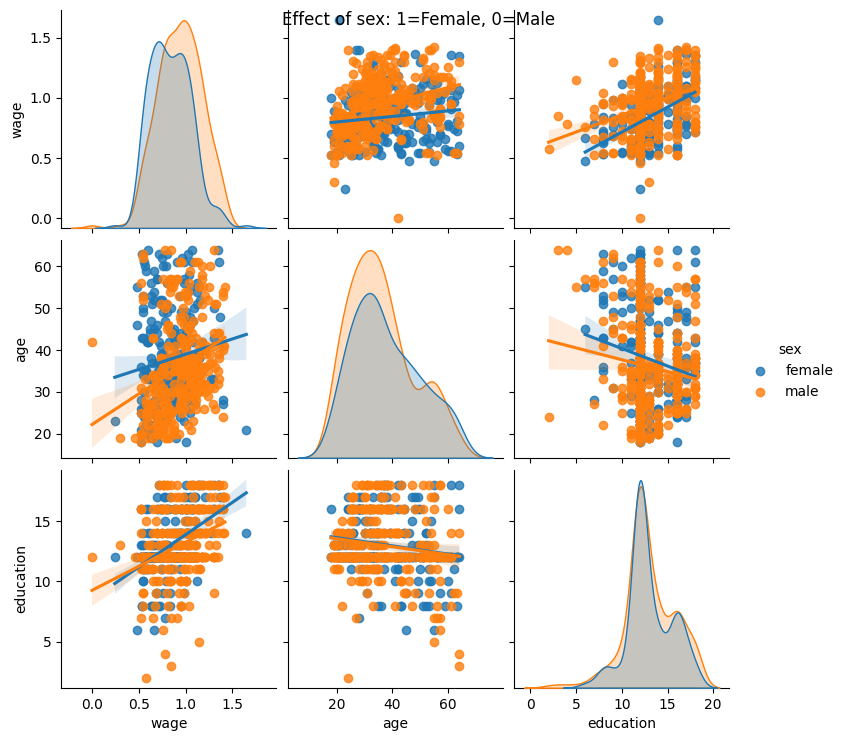

In [24]:
seaborn.pairplot(data, vars=["wage", "age", "education"], kind="reg", hue="sex")
plt.suptitle("Effect of sex: 1=Female, 0=Male")

Text(0.5, 0.98, 'Effect of race: 1=Other, 2=Hispanic, 3=White')

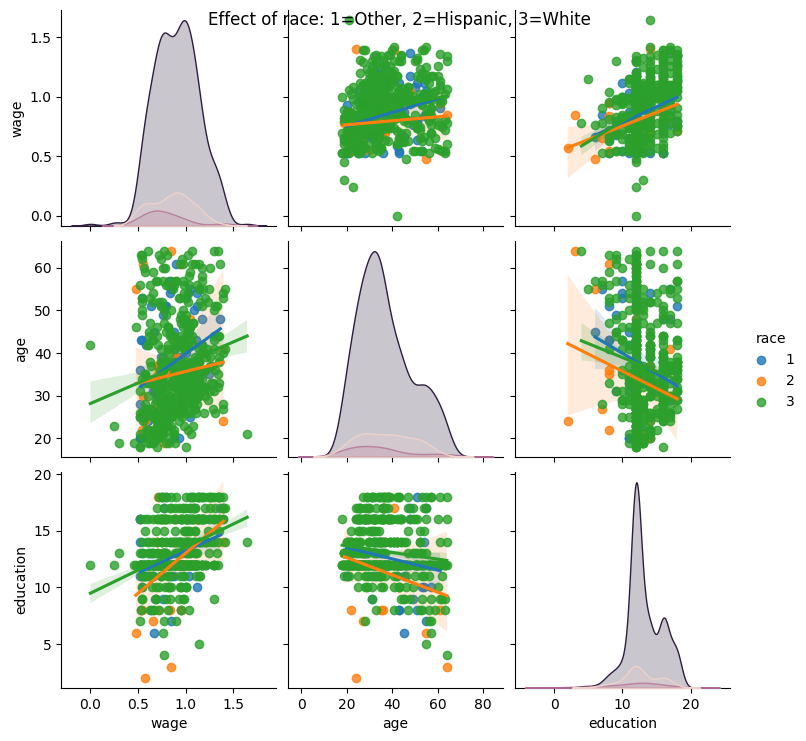

In [25]:
seaborn.pairplot(data, vars=["wage", "age", "education"], kind="reg", hue="race")
plt.suptitle("Effect of race: 1=Other, 2=Hispanic, 3=White")

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

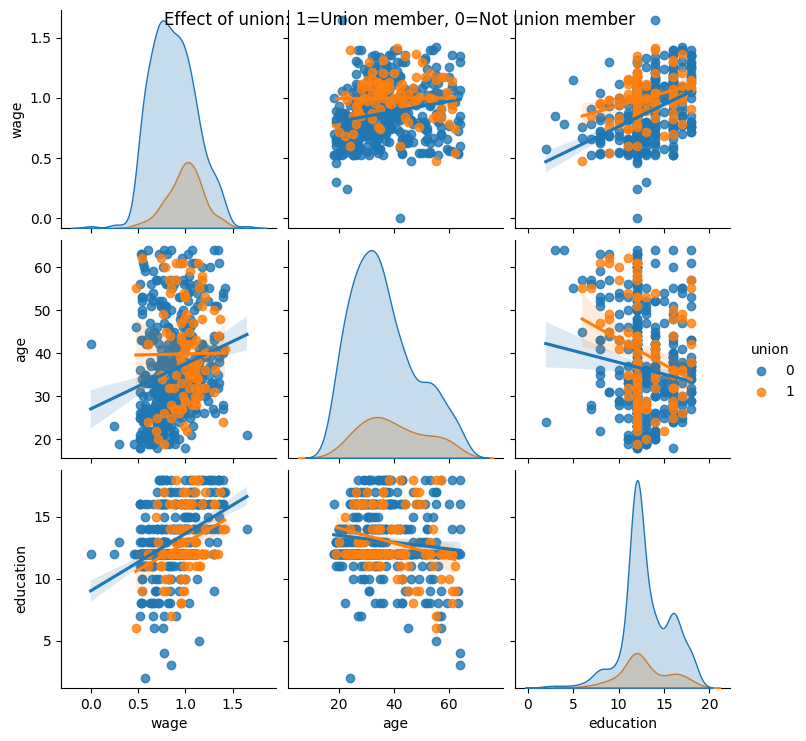

In [26]:
seaborn.pairplot(data, vars=["wage", "age", "education"], kind="reg", hue="union")
plt.suptitle("Effect of union: 1=Union member, 0=Not union member")

Plot a simple regression

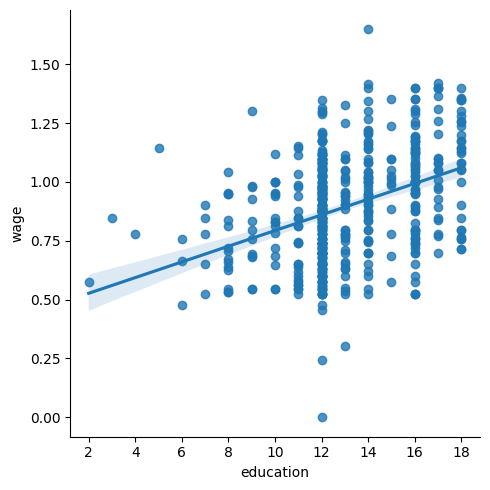

In [27]:
seaborn.lmplot(y="wage", x="education", data=data)

(test-for-an-education-sex-interaction-in-wages)=

## Test for an education/sex interaction in wages

<!--- plot_wage_education_gender -->

Wages depend mostly on education. Here we investigate how this dependence
is related to gender: not only does gender create an offset in wages, it
also seems that wages increase more with education for males than
females.

Does our data support this last hypothesis? We will test this using
statsmodels' formulas
(http://statsmodels.sourceforge.net/stable/example_formulas.html).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           2.01e-25
Time:                        11:37:00   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4053      0.046      8.732      0.000       0.314       0.496
sex[T.male]     0.1008      0.018      5.625      0.000       0.066       0.136
education       0.0334      0.003      9.768      0.000       0.027       0.040
==============================================================================
Omnibus:                        4.675   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.876
Skew:                          -0.147   Prob(JB):                       0.0873
Kurtosis:                       3.365   Cond. No.                         69.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

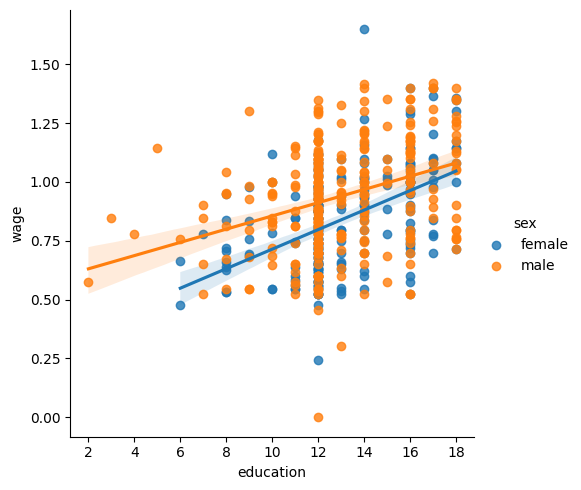

In [28]:
# simple plotting

# Plot 2 linear fits for male and female.
seaborn.lmplot(y="wage", x="education", hue="sex", data=data)

# statistical analysis
import statsmodels.formula.api as sm

# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula="wage ~ education + sex", data=data).fit()
result.summary()

In [29]:
# The plots above highlight that there is not only a different offset in
# wage but also a different slope
#
# We need to model this using an interaction
result = sm.ols(
    formula="wage ~ education + sex + education * sex", data=data
).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           2.94e-25
Time:                        11:37:00   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2998      0.072      4.173      0.000       0.159       0.441
sex[T.male]               0.2750      0.093      2.972      0.003       0.093       0.457
education                 0.0415      0.005      7.647      0.000       0.031       0.052
education:sex[T.male]    -0.0134      0.007     -1.919      0.056      -0.027       0.000
==============================================================================
Omnibus:                        4.838   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.000
Skew:                          -0.156   Prob(JB):                       0.0821
Kurtosis:                       3.356   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-value of the interaction of sex and education, the
data does not support the hypothesis that education benefits males
more than female (p-value > 0.05).

## Other examples

(air-fares-before-and-after-9-11)=

### Air fares before and after 9/11

<!--- plot_airfare -->

This is a business-intelligence (BI) like application.

What is interesting here is that we may want to study fares as a function
of the year, paired accordingly to the trips, or forgetting the year,
only as a function of the trip endpoints.

Using statsmodels' linear models, we find that both with an OLS (ordinary
least square) and a robust fit, the intercept and the slope are
significantly non-zero: the air fares have decreased between 2000 and
2001, and their dependence on distance travelled has also decreased

In [30]:
# As a separator, '\s+' is a regular expression that means 'one or more
# spaces'
data = pd.read_csv(
    "examples/airfares.txt",
    sep=r'\s+',
    header=0,
    names=[
        "city1",
        "city2",
        "pop1",
        "pop2",
        "dist",
        "fare_2000",
        "nb_passengers_2000",
        "fare_2001",
        "nb_passengers_2001",
    ],
)

In [31]:
# we log-transform the number of passengers
data["nb_passengers_2000"] = np.log10(data["nb_passengers_2000"])
data["nb_passengers_2001"] = np.log10(data["nb_passengers_2001"])

Make a dataframe with the year as an attribute, instead of separate columns

This involves a small danse in which we separate the dataframes in 2,
one for year 2000, and one for 2001, before concatenating again.

In [32]:
# Make an index of each flight
data_flat = data.reset_index()

In [33]:
data_2000 = data_flat[
    ["city1", "city2", "pop1", "pop2", "dist", "fare_2000", "nb_passengers_2000"]
]
# Rename the columns
data_2000.columns = pd.Index(
    ["city1", "city2", "pop1", "pop2", "dist", "fare", "nb_passengers"]
)
# Add a column with the year
data_2000.insert(0, "year", 2000)

In [34]:
data_2001 = data_flat[
    ["city1", "city2", "pop1", "pop2", "dist", "fare_2001", "nb_passengers_2001"]
]
# Rename the columns
data_2001.columns = pd.Index(
    ["city1", "city2", "pop1", "pop2", "dist", "fare", "nb_passengers"]
)
# Add a column with the year
data_2001.insert(0, "year", 2001)

In [35]:
data_flat = pd.concat([data_2000, data_2001])

Plot scatter matrices highlighting different aspects

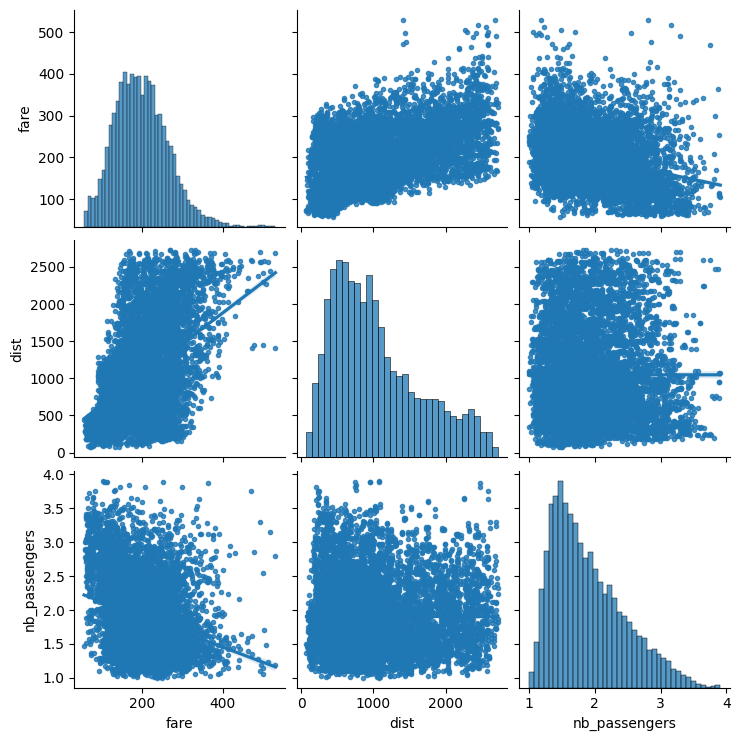

In [36]:
seaborn.pairplot(
    data_flat, vars=["fare", "dist", "nb_passengers"], kind="reg", markers="."
)

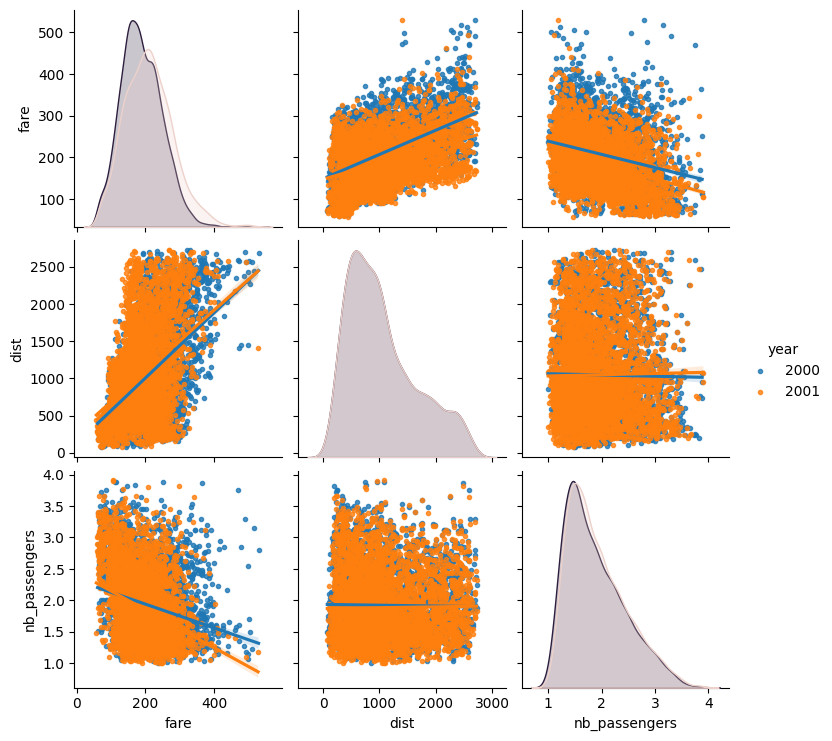

In [37]:
# A second plot, to show the effect of the year (ie the 9/11 effect)
seaborn.pairplot(
    data_flat,
    vars=["fare", "dist", "nb_passengers"],
    kind="reg",
    hue="year",
    markers=".",
)

Plot the difference in fare

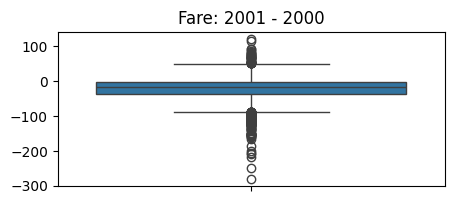

In [38]:
plt.figure(figsize=(5, 2))
seaborn.boxplot(data.fare_2001 - data.fare_2000)
plt.title("Fare: 2001 - 2000")
plt.subplots_adjust()

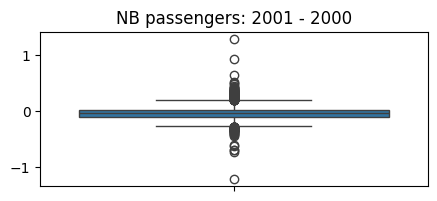

In [39]:
plt.figure(figsize=(5, 2))
seaborn.boxplot(data.nb_passengers_2001 - data.nb_passengers_2000)
plt.title("NB passengers: 2001 - 2000")
plt.subplots_adjust()

In [40]:
# Statistical testing: dependence of fare on distance and number of
# passengers
result = sm.ols(formula="fare ~ 1 + dist + nb_passengers", data=data_flat).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1585.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:37:08   Log-Likelihood:                -45532.
No. Observations:                8352   AIC:                         9.107e+04
Df Residuals:                    8349   BIC:                         9.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       211.2428      2.466     85.669      0.000     206.409     216.076
dist              0.0484      0.001     48.149      0.000       0.046       0.050
nb_passengers   -32.8925      1.127    -29.191      0.000     -35.101     -30.684
==============================================================================
Omnibus:                      604.051   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.733
Skew:                           0.710   Prob(JB):                    1.42e-161
Kurtosis:                       3.338   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Using a robust fit
result = sm.rlm(formula="fare ~ 1 + dist + nb_passengers", data=data_flat).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   fare   No. Observations:                 8352
Model:                            RLM   Df Residuals:                     8349
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 30 Sep 2025                                         
Time:                        11:37:08                                         
No. Iterations:                    12                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       215.0848      2.448     87.856      0.000     210.287     219.883
dist              0.0460      0.001     46.166      0.000       0.044       0.048
nb_passengers   -35.2686      1.119    -31.526      0.000     -37.461     -33.076
=================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

Statistical testing: regression of fare on distance: 2001/2000 difference

In [42]:
result = sm.ols(formula="fare_2001 - fare_2000 ~ 1 + dist", data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fare_2001   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     791.7
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          1.20e-159
Time:                        11:37:08   Log-Likelihood:                -22640.
No. Observations:                4176   AIC:                         4.528e+04
Df Residuals:                    4174   BIC:                         4.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.0279      1.673     88.480      0.000     144.748     151.308
dist           0.0388      0.001     28.136      0.000       0.036       0.041
==============================================================================
Omnibus:                      136.558   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.624
Skew:                           0.462   Prob(JB):                     3.23e-33
Kurtosis:                       2.920   Cond. No.                     2.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

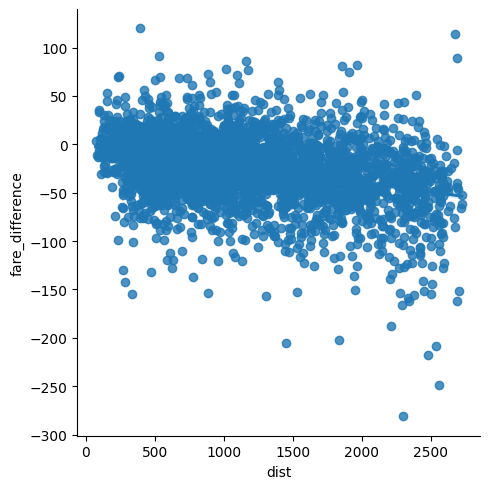

In [43]:
# Plot the corresponding regression
data["fare_difference"] = data["fare_2001"] - data["fare_2000"]
seaborn.lmplot(x="dist", y="fare_difference", data=data)

(relating-gender-and-iq)=

### Relating Gender and IQ

<!--- plot_brain_size -->

Going back to the brain size + IQ data, test if the VIQ of male and
female are different after removing the effect of brain size, height and
weight.

Notice that here 'Gender' is a categorical value. As it is a non-float
data type, statsmodels is able to automatically infer this.

In [44]:
data = pd.read_csv("examples/brain_size.csv", sep=";", na_values=".")

model = smf.ols("VIQ ~ Gender + MRI_Count + Height", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Tue, 30 Sep 2025   Prob (F-statistic):             0.0184
Time:                        11:37:08   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.876      0.069     -13.696     346.948
Gender[T.Male]     8.8524     10.710      0.827      0.414     -12.890      30.595
MRI_Count          0.0002   6.46e-05      2.615      0.013    3.78e-05       0.000
Height            -3.0837      1.276     -2.417      0.021      -5.674      -0.494
==============================================================================
Omnibus:                        7.373   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.252
Skew:                           0.005   Prob(JB):                        0.324
Kurtosis:                       1.823   Cond. No.                     2.40e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

<F test: F=0.6831960845842278, p=0.4140878441244722, df_denom=35, df_num=1>


Here we plot a scatter matrix to get intuitions on our results.
This goes beyond what was asked in the exercise

This plotting is useful to get an intuitions on the relationships between
our different variables

In [46]:
# Fill in the missing values for Height for plotting
data["Height"] = data["Height"].ffill()

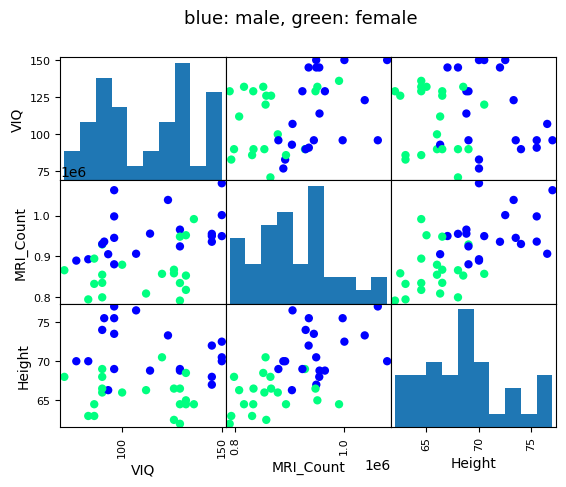

In [47]:
# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap
pd.plotting.scatter_matrix(
    data[["VIQ", "MRI_Count", "Height"]],
    c=(data["Gender"] == "Female"),
    marker="o",
    alpha=1,
    cmap="winter",
)

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13);